# Data Visualization in Python

Data visualization is the discipline of trying to understand data by placing it in a visual context so that patterns, trends and correlations that might not otherwise be detected can be exposed.

To extract the required information from the different visuals we create, it is quintessential that we use the correct representation based on the type of data and the questions that we are trying to understand. We will go through a set of most widely used representations below and how we can use them in the most effective manner.

In [166]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [167]:
iris = pd.read_csv('iris.csv', names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'])
print(iris.head())

   sepal_length  sepal_width  petal_length  petal_width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [168]:
wine_reviews = pd.read_csv('winemag-data-130k-v2.csv', index_col=0)
wine_reviews.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


## Bar chart

A bar chart is used when we want to compare metric values across different subgroups of the data.

To plot a bar-chart we can use the plot.bar() method, but before we can call this we need to get our data. For this we will first count the occurrences using the value_count() method and then sort the occurrences from smallest to largest using the sort_index() method.

<Axes: xlabel='points'>

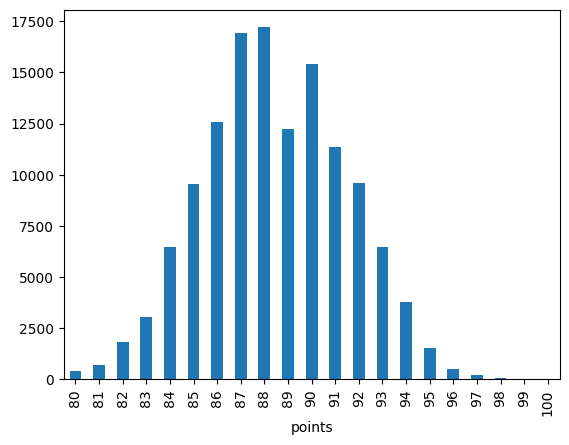

In [169]:
wine_reviews['points'].value_counts().sort_index().plot.bar()

It’s also really simple to make a horizontal bar-chart using the plot.barh() method.

<Axes: ylabel='points'>

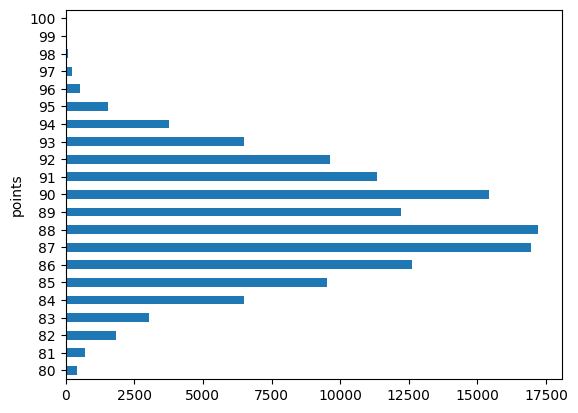

In [170]:
wine_reviews['points'].value_counts().sort_index().plot.barh()

We can also plot other data then the number of occurrences.

<Axes: xlabel='country'>

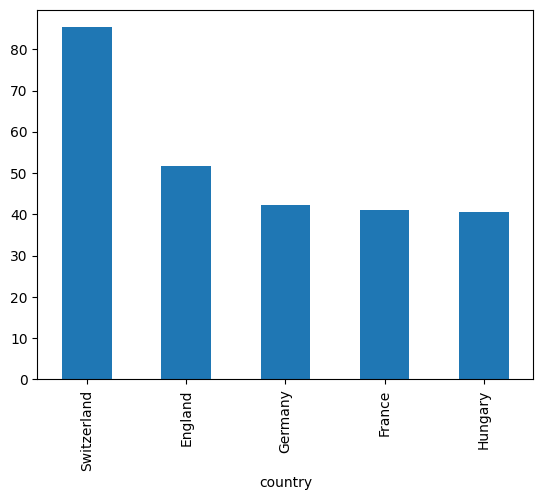

In [171]:
wine_reviews.groupby("country").price.mean().sort_values(ascending=False)[:5].plot.bar()

In the example above we grouped the data by country and then took the mean of the wine prices, ordered it, and plotted the 5 countries with the highest average wine price.

## Line chart

A line chart is used for the representation of continuous data points. This visual can be effectively utilized when we want to understand the trend across time.

In Matplotlib we can create a line chart by calling the plot method. We can also plot multiple columns in one graph, by looping through the columns we want and plotting each column on the same axis.

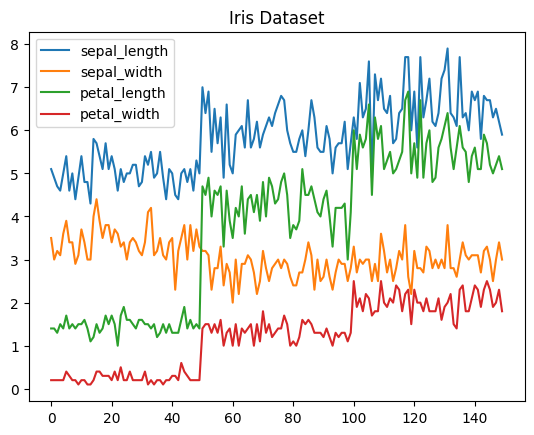

In [172]:
# get columns to plot
columns = iris.columns.drop(['class'])
# create x data
x_data = range(0, iris.shape[0])
# create figure and axis
fig, ax = plt.subplots()
# plot each column
for column in columns:
    ax.plot(x_data, iris[column], label=column)
# set title and legend
ax.set_title('Iris Dataset')
ax.legend()

## Histogram

Column histograms are used to observe the distribution for a single variable.

In Matplotlib we can create a Histogram using the hist method. If we pass it categorical data like the points column from the wine-review dataset it will automatically calculate how often each class occurs.

Text(0, 0.5, 'Frequency')

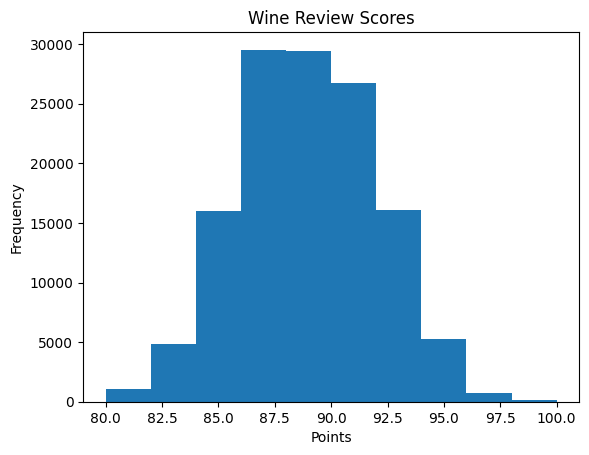

In [173]:
# create figure and axis
fig, ax = plt.subplots()
# plot histogram
ax.hist(wine_reviews['points'])
# set title and labels
ax.set_title('Wine Review Scores')
ax.set_xlabel('Points')
ax.set_ylabel('Frequency')

## Scatter plot

Scatter plots can be leveraged to identify relationships between two variables. It can be effectively used in circumstances where the dependent variable can have multiple values for the independent variable.

To create a scatter plot in Matplotlib we can use the scatter method. We will also create a figure and an axis using plt.subplots so we can give our plot a title and labels.

Text(0, 0.5, 'sepal_width')

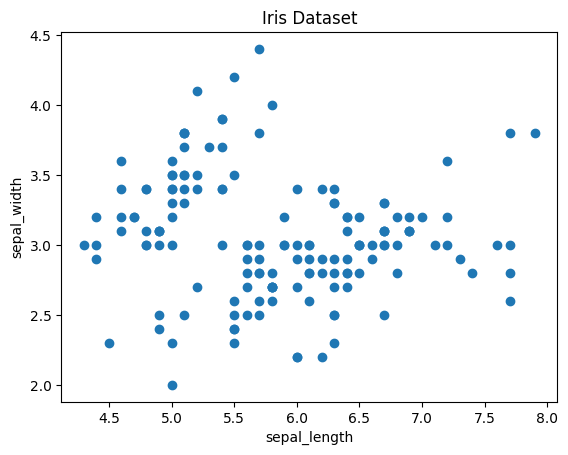

In [174]:
# create a figure and axis
fig, ax = plt.subplots()

# scatter the sepal_length against the sepal_width
ax.scatter(iris['sepal_length'], iris['sepal_width'])
# set a title and labels
ax.set_title('Iris Dataset')
ax.set_xlabel('sepal_length')
ax.set_ylabel('sepal_width')

We can give the graph more meaning by coloring in each data-point by its class. This can be done by creating a dictionary which maps from class to color and then scattering each point on its own using a for-loop and passing the respective color.

Text(0, 0.5, 'sepal_width')

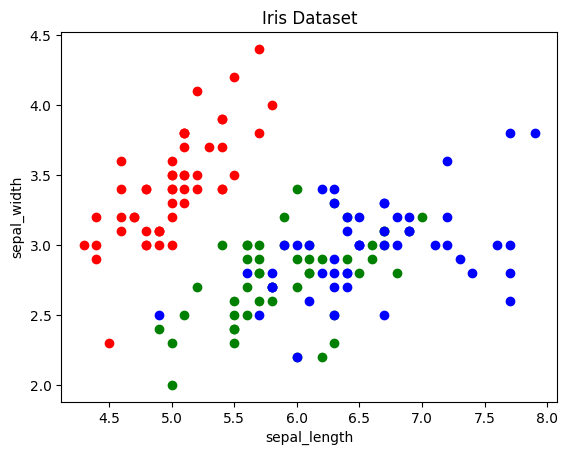

In [175]:
# create color dictionary
colors = {'Iris-setosa':'r', 'Iris-versicolor':'g', 'Iris-virginica':'b'}
# create a figure and axis
fig, ax = plt.subplots()
# plot each data-point
for i in range(len(iris['sepal_length'])):
    ax.scatter(iris['sepal_length'][i], iris['sepal_width'][i],color=colors[iris['class'][i]])
# set a title and labels
ax.set_title('Iris Dataset')
ax.set_xlabel('sepal_length')
ax.set_ylabel('sepal_width')

## Scatter matrix

It enables you to plot a grid of pairwise relationships in a dataset. 

This technique is always plotting two features with each other. The diagonal of the graph is filled with histograms and the other plots are scatter plots.

C:\Users\adams\AppData\Local\Temp\ipykernel_44052\2029773638.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  scatter_matrix(iris, alpha=1, ax=ax)


array([[<Axes: xlabel='sepal_length', ylabel='sepal_length'>,
        <Axes: xlabel='sepal_width', ylabel='sepal_length'>,
        <Axes: xlabel='petal_length', ylabel='sepal_length'>,
        <Axes: xlabel='petal_width', ylabel='sepal_length'>],
       [<Axes: xlabel='sepal_length', ylabel='sepal_width'>,
        <Axes: xlabel='sepal_width', ylabel='sepal_width'>,
        <Axes: xlabel='petal_length', ylabel='sepal_width'>,
        <Axes: xlabel='petal_width', ylabel='sepal_width'>],
       [<Axes: xlabel='sepal_length', ylabel='petal_length'>,
        <Axes: xlabel='sepal_width', ylabel='petal_length'>,
        <Axes: xlabel='petal_length', ylabel='petal_length'>,
        <Axes: xlabel='petal_width', ylabel='petal_length'>],
       [<Axes: xlabel='sepal_length', ylabel='petal_width'>,
        <Axes: xlabel='sepal_width', ylabel='petal_width'>,
        <Axes: xlabel='petal_length', ylabel='petal_width'>,
        <Axes: xlabel='petal_width', ylabel='petal_width'>]], dtype=object)

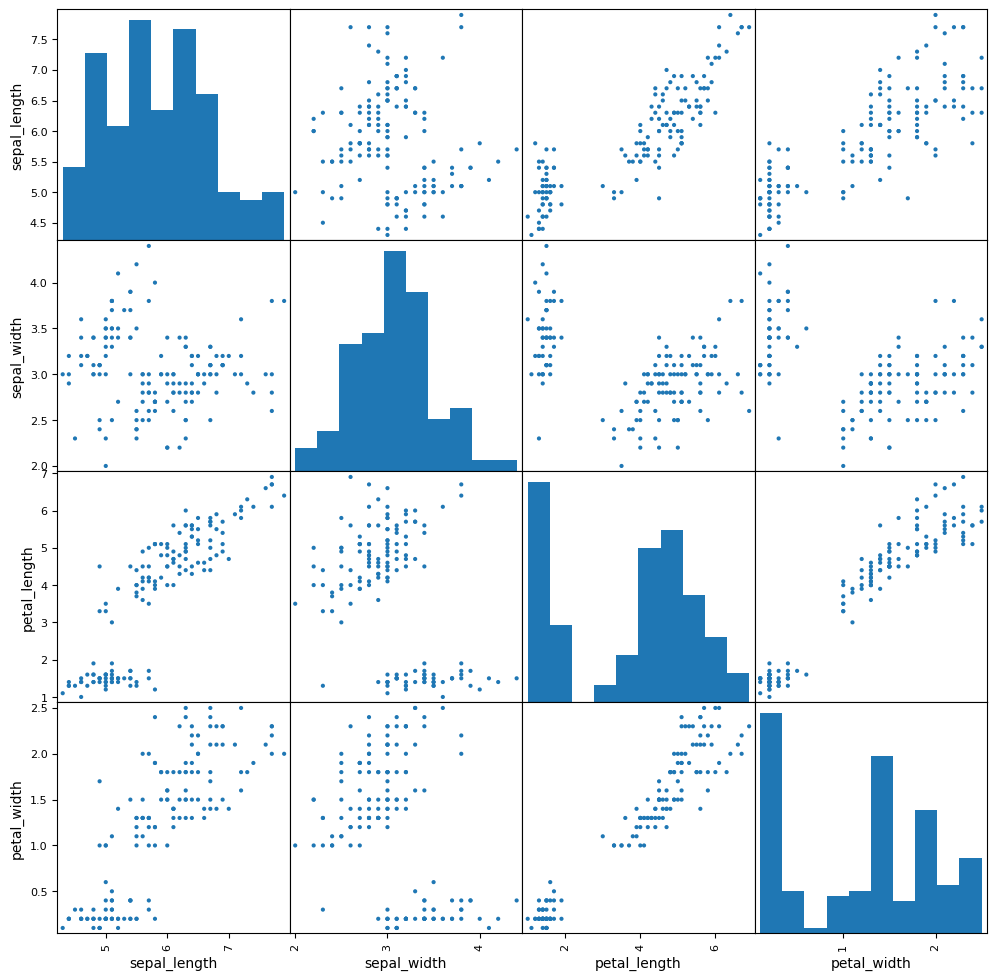

In [176]:
from pandas.plotting import scatter_matrix

fig, ax = plt.subplots(figsize=(12,12))
scatter_matrix(iris, alpha=1, ax=ax)

## Box plot

A box plot is used to show the shape of the distribution, its central value, and its variability.

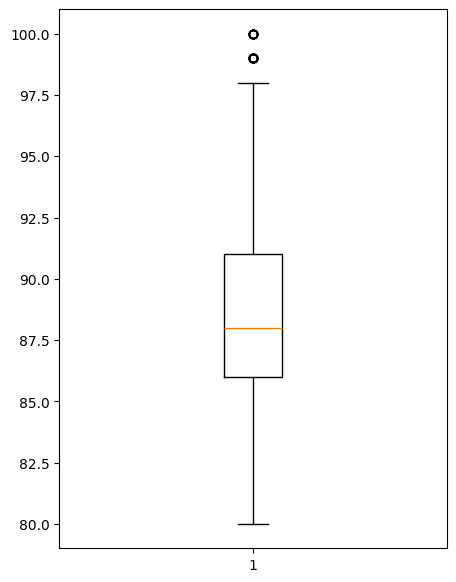

In [177]:
fig = plt.figure(figsize=(5,7))
# Creating plot
plt.boxplot(wine_reviews['points'])
# show plot
plt.show()

## Bubble chart

Scatter plots can be leveraged to depict and show relationships among three variables.

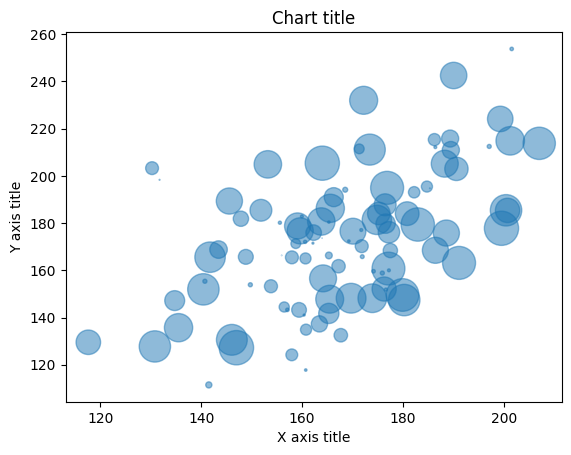

In [178]:
#Creating the dataset
np.random.seed(42)
N = 100
x = np.random.normal(170, 20, N)
y = x + np.random.normal(5, 25, N)
colors = np.random.rand(N)
area = (25 * np.random.rand(N))**2
df = pd.DataFrame({
    'X': x,
    'Y': y,
    'Colors': colors,
    "bubble_size":area})
#Creating the bubble chart
plt.scatter('X', 'Y', s='bubble_size',alpha=0.5, data=df)
#Adding the aesthetics
plt.title('Chart title')
plt.xlabel('X axis title')
plt.ylabel('Y axis title') 
#Show the plot
plt.show()

## Pie chart

Pie charts can be used to identify proportions of the different components in a given whole.

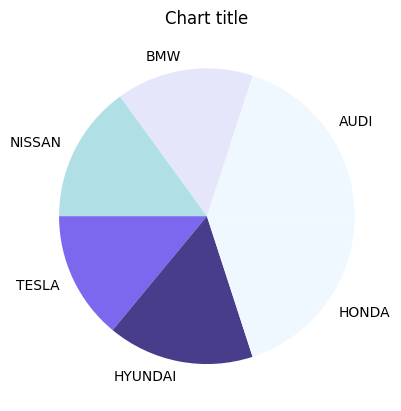

In [179]:
#Creating the dataset
cars = ['AUDI', 'BMW', 'NISSAN', 
        'TESLA', 'HYUNDAI', 'HONDA'] 
data = [20, 15, 15, 14, 16, 20] 
#Creating the pie chart
plt.pie(data, labels = cars,colors = ['#F0F8FF','#E6E6FA','#B0E0E6','#7B68EE','#483D8B'])
#Adding the aesthetics
plt.title('Chart title')
#Show the plot
plt.show()

## Assignment

In [180]:
df=pd.read_csv("StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Task 1. (0.5 point)

Visualization of percentage distribution of gender.

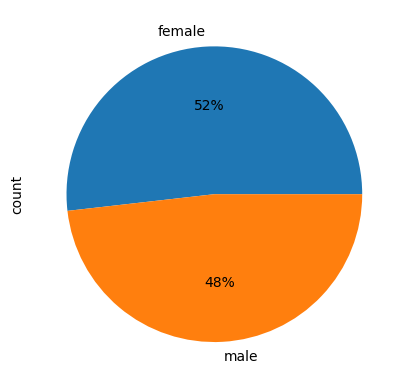

In [193]:
# Your answer here
total_gender = df['gender'].value_counts().plot.pie(autopct='%1.0f%%')

### Task 2. (0.5 point)

Prepare visualization of parental level of education.

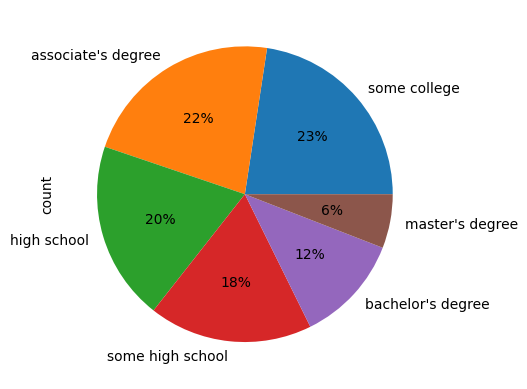

In [194]:
# Your answer here
par_lv_education = df["parental level of education"].value_counts().plot.pie(autopct='%1.0f%%')

### Task 3. (0.5 point)

Check a correlation between test preparation and different test scores (math, reading and writing).

C:\Users\adams\AppData\Local\Temp\ipykernel_44052\1389316079.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cor_df["test preparation course"] = cor_df["test preparation course"].apply(lambda r: 1 if r=='completed' else 0)


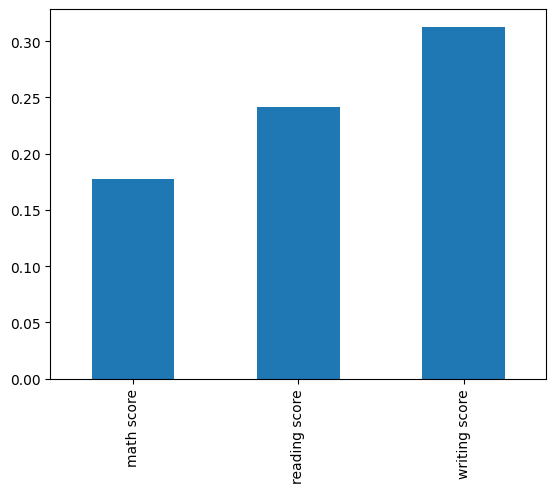

In [195]:
# Your answer here
cor_df = df[["test preparation course", "math score", "reading score", "writing score"]]
cor_df["test preparation course"] = cor_df["test preparation course"].apply(lambda r: 1 if r=='completed' else 0)
cor_df.corr().iloc[0,1:].plot(kind="bar")
plt.show()

#### The Amazon rainforest fires in Brazil

In [211]:
df=pd.read_csv("amazon.csv", encoding='latin1')
df.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


### Task 4. (1 point)

Show how number of fires is changing over time.


C:\Users\adams\AppData\Local\Temp\ipykernel_44052\1491490823.py:2: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  total = df.groupby("year")["number"].agg(sum).plot.bar()


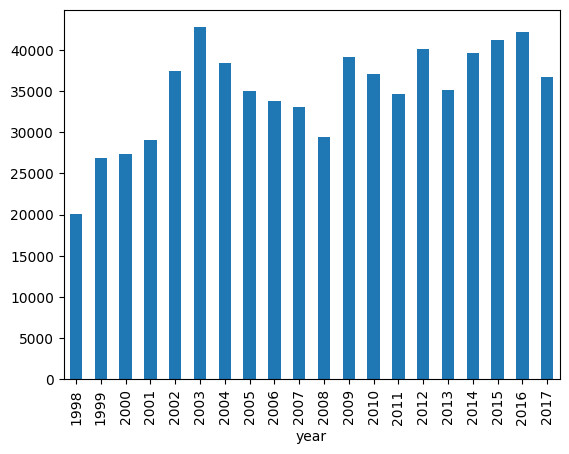

In [197]:
# Your answer here
total = df.groupby("year")["number"].agg(sum).plot.bar()

### Task 5. (1 points)

Show the distribution of the number of fires in the hottest months.

C:\Users\adams\AppData\Local\Temp\ipykernel_44052\2219091376.py:6: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df.groupby("month")["number"].agg(sum)[5:9].plot.bar()


<Axes: xlabel='month'>

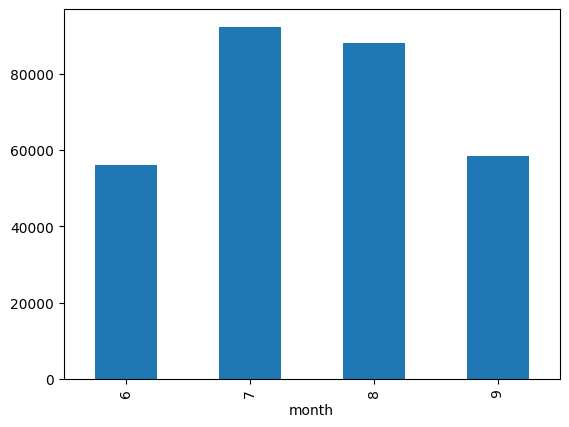

In [212]:
# Your answer here
mapping = {'Janeiro': 1,'Fevereiro': 2,'Março': 3,'Abril': 4,'Maio': 5,'Junho': 6,'Julho': 7,
          'Agosto': 8,'Setembro': 9,'Outubro': 10,'Novembro': 11,'Dezembro': 12}
df["month"] = df["month"].map(mapping)

df.groupby("month")["number"].agg(sum)[5:9].plot.bar()

### Task 6. (1 point)

Visualize the average number of fires in Brazil per month.

C:\Users\adams\AppData\Local\Temp\ipykernel_44052\497019339.py:2: FutureWarning: The provided callable <function mean at 0x000001B00BB73CE0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.groupby("month")["number"].agg(np.mean).plot.bar()


<Axes: xlabel='month'>

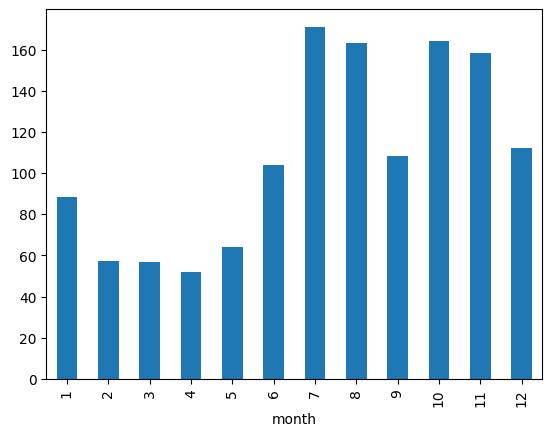

In [209]:
# Your answer here
df.groupby("month")["number"].agg(np.mean).plot.bar()

### Task 7. (0.5 point)

Visualize the relationship between state, year and a number of fires.

<Axes: xlabel='year', ylabel='state'>

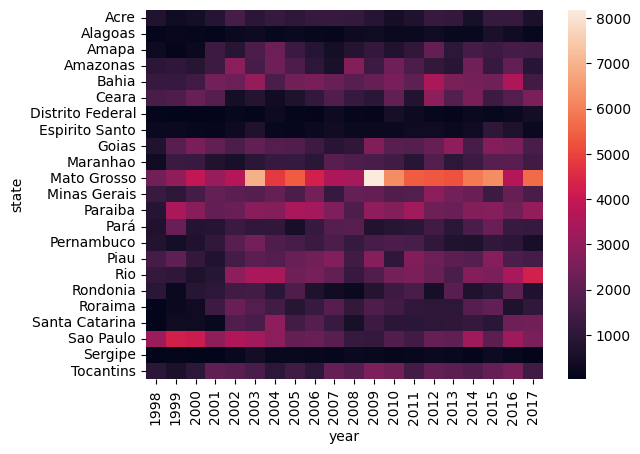

In [213]:
# Your answer
import seaborn as sns
df = df.groupby(['state','year'])["number"].sum().unstack(fill_value=0)
sns.heatmap(df)